<a href="https://colab.research.google.com/github/lovellbrian/Chollet/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chollet  p105

On the other hand, if the network has limited memorization resources, it won’t be
able to learn this mapping as easily; thus, in order to minimize its loss, it will have to
resort to learning compressed representations that have predictive power regarding
the targets—precisely the type of representations we’re interested in. At the same
time, keep in mind that you should use models that have enough parameters that they
don’t underfit: your model shouldn’t be starved for memorization resources. There is
a compromise to be found between too much capacity and not enough capacity.
Unfortunately, there is no magical formula to determine the right number of layers
or the right size for each layer. You must evaluate an array of different architectures
(on your validation set, not on your test set, of course) in order to find the
correct model size for your data. The general workflow to find an appropriate model
size is to start with relatively few layers and parameters, and increase the size of the layers
or add new layers until you see diminishing returns with regard to validation loss.
Let’s try this on the movie-review classification network. The original network is
shown next.




In [36]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now let’s try to replace it with this smaller network.

In [37]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Original Model

In [38]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) # turn off some warnings
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [39]:
# Original model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_orig = history_dict['val_loss']



Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5848 - acc: 0.7094 - val_loss: 0.3780 - val_acc: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3174 - acc: 0.9028 - val_loss: 0.3161 - val_acc: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2163 - acc: 0.9356 - val_loss: 0.2749 - val_acc: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1676 - acc: 0.9489 - val_loss: 0.3055 - val_acc: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1333 - acc: 0.9605 - val_loss: 0.2834 - val_acc: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1078 - acc: 0.9689 - val_loss: 0.3029 - val_acc: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0847 - acc: 0.9771 - val_loss: 0.3432 - val_acc: 0.8757
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0686 - a

Smaller Model

In [40]:
# Smaller model
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_small = history_dict['val_loss']



Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.6595 - acc: 0.6230 - val_loss: 0.5600 - val_acc: 0.8352
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5217 - acc: 0.8579 - val_loss: 0.4686 - val_acc: 0.8564
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4236 - acc: 0.8888 - val_loss: 0.4016 - val_acc: 0.8733
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3487 - acc: 0.9060 - val_loss: 0.3532 - val_acc: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2920 - acc: 0.9191 - val_loss: 0.3202 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2529 - acc: 0.9289 - val_loss: 0.3012 - val_acc: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2198 - acc: 0.9359 - val_loss: 0.2851 - val_acc: 0.8908
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1931 - a

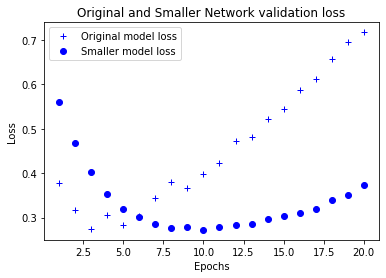

In [41]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_orig, 'b+', label='Original model loss')
plt.plot(epochs, val_loss_values_small, 'bo', label='Smaller model loss')
plt.title('Original and Smaller Network validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the smaller network starts overfitting later than the reference network
(after six epochs rather than four), and its performance degrades more slowly once it
starts overfitting.
Now, for kicks, let’s add to this benchmark a network that has much more capacity—
far more than the problem warrants.

Bigger Model

In [42]:
# Bigger model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_big = history_dict['val_loss']



Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6549 - acc: 0.6725 - val_loss: 0.3362 - val_acc: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2634 - acc: 0.8933 - val_loss: 0.3003 - val_acc: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1548 - acc: 0.9411 - val_loss: 0.3720 - val_acc: 0.8530
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0683 - acc: 0.9787 - val_loss: 0.3562 - val_acc: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0323 - acc: 0.9930 - val_loss: 0.3231 - val_acc: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0074 - acc: 0.9997 - val_loss: 0.5078 - val_acc: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 7.0820e-04 - acc: 1.0000 - val_loss: 0.6367 - val_acc: 0.8895
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 1.0370

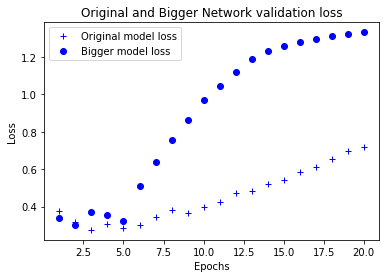

In [43]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_orig, 'b+', label='Original model loss')
plt.plot(epochs, val_loss_values_big, 'bo', label='Bigger model loss')
plt.title('Original and Bigger Network validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This Figure shows how the bigger network fares compared to the reference network.
The dots are the validation loss values of the bigger network, and the crosses are the
initial network.

L2-regularization model

In [44]:
# L2 Rregularized model
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_L2 = history_dict['val_loss']



Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.6256 - acc: 0.7019 - val_loss: 0.4151 - val_acc: 0.8755
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3578 - acc: 0.9058 - val_loss: 0.3467 - val_acc: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2795 - acc: 0.9240 - val_loss: 0.3285 - val_acc: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2468 - acc: 0.9373 - val_loss: 0.3493 - val_acc: 0.8800
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2203 - acc: 0.9464 - val_loss: 0.3337 - val_acc: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1990 - acc: 0.9566 - val_loss: 0.4040 - val_acc: 0.8643
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1990 - acc: 0.9521 - val_loss: 0.3674 - val_acc: 0.8805
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1849 - a

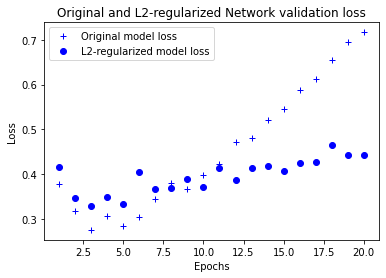

In [45]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_orig, 'b+', label='Original model loss')
plt.plot(epochs, val_loss_values_L2, 'bo', label='L2-regularized model loss')
plt.title('Original and L2-regularized Network validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This Figure shows the impact of the L2 regularization penalty. As you can see, the
model with L2 regularization (dots) has become much more resistant to overfitting
than the reference model (crosses), even though both models have the same number
of parameters.

Dropout model

In [46]:
# Dropout model
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_dropout = history_dict['val_loss']

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.6655 - acc: 0.5861 - val_loss: 0.5449 - val_acc: 0.8372
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5517 - acc: 0.7503 - val_loss: 0.4435 - val_acc: 0.8675
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4696 - acc: 0.7986 - val_loss: 0.3709 - val_acc: 0.8784
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4048 - acc: 0.8390 - val_loss: 0.3312 - val_acc: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3506 - acc: 0.8684 - val_loss: 0.2953 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3094 - acc: 0.8897 - val_loss: 0.2892 - val_acc: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2782 - acc: 0.9026 - val_loss: 0.2754 - val_acc: 0.8890
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2500 - a

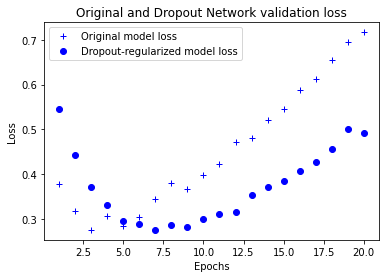

In [47]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_orig, 'b+', label='Original model loss')
plt.plot(epochs, val_loss_values_dropout, 'bo', label='Dropout-regularized model loss')
plt.title('Original and Dropout Network validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This Figure shows a plot of the results. Again, this is a clear improvement over the reference
network.

To recap, these are the most common ways to prevent overfitting in neural networks:
* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.